In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud
import nltk

In [3]:
text_mini = pd.read_csv('tourist_accommodation_reviews.csv', encoding = 'latin')

In [4]:
text_mini.head()

,ï»¿ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [5]:
text_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ï»¿ID                  53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [6]:
#selecting 30 hotel with least reviews
least30= text_mini['Hotel/Restaurant name'].value_counts().tail(30).index.tolist()

In [7]:
least30

['Divino Tapas Restaurant',
 'Dee Plee - Anantara Layan Phuket Resort',
 'The Siam Mumbai',
 'Navrang Mahal',
 'Khun Pha',
 'Rossovivo Ristorante Italiano E Pizzeria',
 'Le Brooklyn Patong',
 'Restaurant Royale Nam Tok',
 "Norbu's Steakhouse",
 'Salt & Pepper Restaurant Steakhouse Pizzeria',
 'Trattoria pizzeria Cosa Nostra Delivery',
 'Austrian Garden Restaurant',
 'Ristorante Pizzeria Zafferano',
 'Baia Del Sole',
 'Mor Mu Dong',
 'The Cook',
 'Boulangerie Chez Nous',
 'Tokyo Japanese Restaurant',
 'Lobster & Prawn Restaurant',
 'Restaurant Georgia',
 'Kazu Patong Phuket',
 '+39 Italian Street Food',
 'Shameena Restaurant and Lounge',
 'Red Chopsticks At Patong',
 'La Capannina da Mario',
 "Sultan's Grill Authentic Turkish & Indian Cuisine",
 'Som Restaurant',
 'Chez Nicolas',
 'Dada Yura Restaurant',
 'Chekhoff Restaurant and Bar']

In [8]:
reviews = pd.DataFrame(columns=text_mini.columns)
for hotel in least30:
    reviews = pd.concat([reviews, text_mini[text_mini['Hotel/Restaurant name']==hotel]])
    



In [9]:
reviews

,ï»¿ID,Review Date,Location,Hotel/Restaurant name,Review
43022,rn578120374,Reviewed 2 weeks ago,Rawai,Divino Tapas Restaurant,We were a group of 7. Everyone loved their foo...
43023,rn560526201,"Reviewed February 14, 2018",Rawai,Divino Tapas Restaurant,Party of 3. Some drinks and sides. Well prepar...
43024,rn557885306,"Reviewed February 2, 2018",Rawai,Divino Tapas Restaurant,"On our annual visit to Phuket, my wife and mys..."
43025,rn553670608,"Reviewed January 13, 2018",Rawai,Divino Tapas Restaurant,A good mixture of Thai food and also others if...
43026,rn548858111,"Reviewed December 23, 2017",Rawai,Divino Tapas Restaurant,This restaurant serves superb Thai food with e...
...,...,...,...,...,...
46862,rn470232824,"Reviewed March 26, 2017",Kata Beach,Chekhoff Restaurant and Bar,Was really surprised people writing reviews ab...
46863,rn371149456,"Reviewed May 8, 2016",Kata Beach,Chekhoff Restaurant and Bar,Good place with nice Russian cuisine. Staff is...
46864,rn564592095,"Reviewed March 5, 2018",Kata Beach,Chekhoff Restaurant and Bar,Living in Kata we passed Chekhoff quite often ...
46865,rn470232824,"Reviewed March 26, 2017",Kata Beach,Chekhoff Restaurant and Bar,Was really surprised people writing reviews ab...


In [10]:
#using SentimentIntensityAnalyzer function
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()

In [11]:
#Generating compound,negative,positive and neutral values
reviews['compound']=[sentiment.polarity_scores(review)['compound'] for review in reviews['Review']]
reviews['neg']=[sentiment.polarity_scores(review)['neg'] for review in reviews['Review']]
reviews['neu']=[sentiment.polarity_scores(review)['neu'] for review in reviews['Review']]
reviews['pos']=[sentiment.polarity_scores(review)['pos'] for review in reviews['Review']]

In [12]:
reviews.head()

,ï»¿ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
43022,rn578120374,Reviewed 2 weeks ago,Rawai,Divino Tapas Restaurant,We were a group of 7. Everyone loved their foo...,0.9393,0.000,0.616,0.384
43023,rn560526201,"Reviewed February 14, 2018",Rawai,Divino Tapas Restaurant,Party of 3. Some drinks and sides. Well prepar...,0.8653,0.035,0.726,0.239
43024,rn557885306,"Reviewed February 2, 2018",Rawai,Divino Tapas Restaurant,"On our annual visit to Phuket, my wife and mys...",0.7184,0.029,0.820,0.152
43025,rn553670608,"Reviewed January 13, 2018",Rawai,Divino Tapas Restaurant,A good mixture of Thai food and also others if...,0.9606,0.000,0.621,0.379
43026,rn548858111,"Reviewed December 23, 2017",Rawai,Divino Tapas Restaurant,This restaurant serves superb Thai food with e...,0.9349,0.035,0.699,0.266


<AxesSubplot:xlabel='compound', ylabel='Count'>

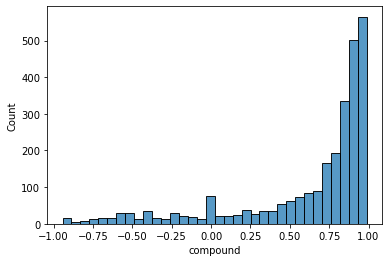

In [13]:
sns.histplot(reviews['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

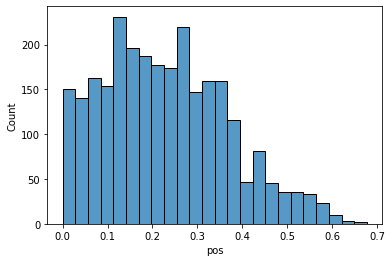

In [14]:
sns.histplot(reviews['pos'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

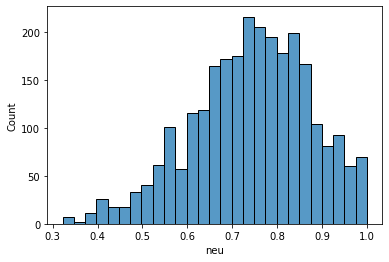

In [15]:
sns.histplot(reviews['neu'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

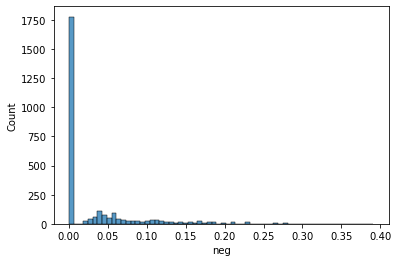

In [16]:
sns.histplot(reviews['neg'])

In [17]:
(reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum().sort_values()

Hotel/Restaurant name
Chekhoff Restaurant and Bar                           0
Sultan's Grill Authentic Turkish & Indian Cuisine     2
Dee Plee - Anantara Layan Phuket Resort               2
The Siam Mumbai                                       3
Shameena Restaurant and Lounge                        3
Austrian Garden Restaurant                            4
Le Brooklyn Patong                                    5
Norbu's Steakhouse                                    6
La Capannina da Mario                                 7
Divino Tapas Restaurant                               8
Restaurant Royale Nam Tok                             9
Baia Del Sole                                         9
Rossovivo Ristorante Italiano E Pizzeria              9
Som Restaurant                                       10
Mor Mu Dong                                          10
The Cook                                             11
Tokyo Japanese Restaurant                            11
Trattoria pizzeria Cosa No

In [31]:
(reviews['compound']>=0).groupby(reviews['Hotel/Restaurant name']).sum().sort_values()

Hotel/Restaurant name
Chekhoff Restaurant and Bar                          30
Dada Yura Restaurant                                 40
Chez Nicolas                                         60
Kazu Patong Phuket                                   70
Boulangerie Chez Nous                                77
Ristorante Pizzeria Zafferano                        78
Navrang Mahal                                        78
Red Chopsticks At Patong                             80
Trattoria pizzeria Cosa Nostra Delivery              81
Salt & Pepper Restaurant Steakhouse Pizzeria         81
Tokyo Japanese Restaurant                            81
The Cook                                             82
Lobster & Prawn Restaurant                           82
+39 Italian Street Food                              82
Baia Del Sole                                        83
Khun Pha                                             84
Restaurant Georgia                                   84
Rossovivo Ristorante Itali

In [60]:
percent_negative=pd.DataFrame((reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name'])
                              .sum()/reviews['Hotel/Restaurant name'].groupby(reviews['Hotel/Restaurant name'])
                              .count()*100,columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative

,% negative reviews
Hotel/Restaurant name,
Chekhoff Restaurant and Bar,0.000000
Dee Plee - Anantara Layan Phuket Resort,2.150538
Sultan's Grill Authentic Turkish & Indian Cuisine,2.197802
The Siam Mumbai,3.225806
Shameena Restaurant and Lounge,3.296703
Austrian Garden Restaurant,4.347826
Le Brooklyn Patong,5.376344
Norbu's Steakhouse,6.451613
La Capannina da Mario,7.692308


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

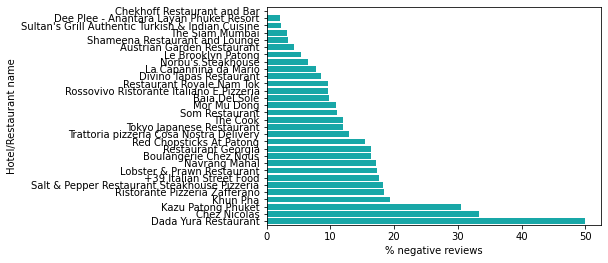

In [61]:
sns.barplot(data=percent_negative,x='% negative reviews',y=percent_negative.index,color='c')

In [47]:
percent_positive=pd.DataFrame((reviews['compound']>0).groupby(reviews['Hotel/Restaurant name'])
                              .sum()/reviews['Hotel/Restaurant name'].groupby(reviews['Hotel/Restaurant name'])
                              .count()*100,columns=['% positive reviews']).sort_values(by='% positive reviews')
percent_positive

,% positive reviews
Hotel/Restaurant name,
Dada Yura Restaurant,50.000000
Chez Nicolas,66.666667
Kazu Patong Phuket,69.565217
Khun Pha,80.645161
Ristorante Pizzeria Zafferano,81.521739
Salt & Pepper Restaurant Steakhouse Pizzeria,81.720430
+39 Italian Street Food,82.417582
Lobster & Prawn Restaurant,82.608696
Navrang Mahal,82.795699


<AxesSubplot:xlabel='% positive reviews', ylabel='Hotel/Restaurant name'>

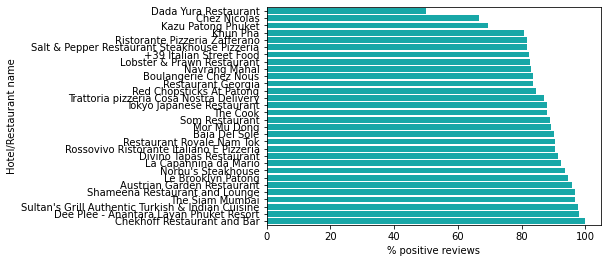

In [48]:
sns.barplot(data=percent_positive,x='% positive reviews',y=percent_positive.index,color='c')

In [62]:
#Function for preprocessing
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

def preprocess_text(text):
  tokenized_doc=nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens=[word.lower() for word in tokenized_doc if word.lower() not in stop_words]
  stemmed_text=[nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [63]:
reviews['processed_review']=reviews['Review'].apply(preprocess_text)
reviews_positive_subset=reviews.loc[(reviews['Hotel/Restaurant name']=='Dada Yura Restaurant') & (reviews['compound']>0),:]
reviews_negative_subset=reviews.loc[(reviews['Hotel/Restaurant name']=='Dada Yura Restaurant') & (reviews['compound']<=0),:]
reviews_negative_subset.head()

,ï»¿ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
52481,rn470303330,"Reviewed March 26, 2017",Kata Beach,Dada Yura Restaurant,One of the most terrific experience in my life...,-0.2516,0.115,0.812,0.073,"[one, terrif, experi, life, travel, lot, servi..."
52482,rn468001722,"Reviewed March 17, 2017",Kata Beach,Dada Yura Restaurant,"Service was non existant, staff untidy and mes...",-0.5673,0.228,0.684,0.089,"[servic, non, exist, staff, untidi, messi, foo..."
52483,rn466399193,"Reviewed March 11, 2017",Kata Beach,Dada Yura Restaurant,"Service was terrible , food was very basic and...",-0.7634,0.210,0.735,0.055,"[servic, terribl, food, basic, tradit, pelmern..."
52487,rn364836775,"Reviewed April 17, 2016",Kata Beach,Dada Yura Restaurant,Really bad quality of food taste is very bad. ...,-0.6789,0.188,0.687,0.125,"[realli, bad, qualiti, food, tast, bad, stake,..."
52489,rn470303330,"Reviewed March 26, 2017",Kata Beach,Dada Yura Restaurant,One of the most terrific experience in my life...,-0.2516,0.115,0.812,0.073,"[one, terrif, experi, life, travel, lot, servi..."


In [64]:
len(reviews_positive_subset),len(reviews_negative_subset)

(40, 40)

<AxesSubplot:ylabel='   '>

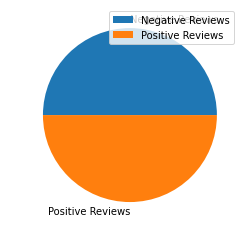

In [65]:
df = pd.DataFrame({'Review': ['Positive Reviews', 'Negative Reviews'],'   ': 
                   [len(reviews_positive_subset), len(reviews_negative_subset)]})
df.groupby(['Review']).sum().plot(kind='pie', y='   ')

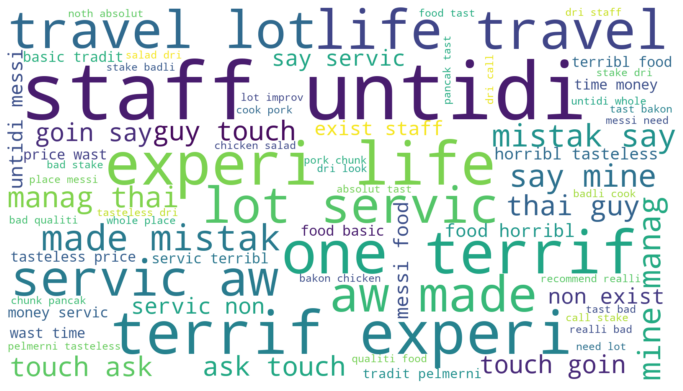

In [66]:
#word cloud of Dada Yura Restaurant negative reviews
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in  review]
wordcloud = WordCloud(background_color='white',width=1600,height=900).generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

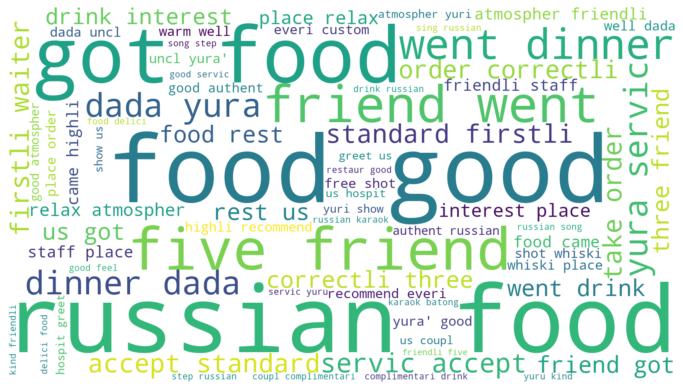

In [67]:
#word cloud of Dada Yura Restaurant positive reviews
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in  review]
wordcloud = WordCloud(background_color='white',width=1600,height=900).generate_from_text(' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

   food russian    good      us   place  friend    went  servic   order     got 
     70      50      50      30      30      20      20      20      20      20 


In [56]:
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

servic   food    dri   tast    lot    say  touch  staff untidi  messi 
    30     30     30     30     20     20     20     20     20     20 


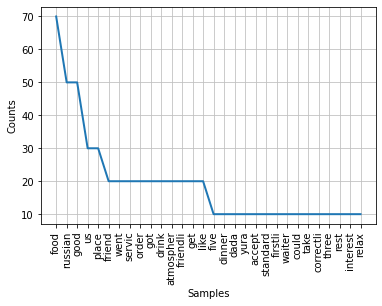

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
pos_freqdist.plot(30)

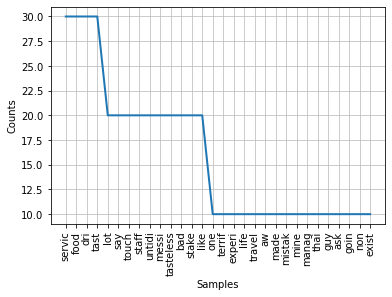

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
neg_freqdist.plot(30)

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
